In [1]:
%matplotlib inline

from pprint import pprint

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc
import spacepy.toolbox as tb
import spacepy.plot as spp


This unreleased version of SpacePy is not supported by the SpacePy team.


/Users/balarsen/miniconda3/envs/python3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# Setup some test data to use
This is from a Poisson dist with mean 50

(array([    9.,   161.,   652.,  2301.,  2803.,  2249.,  1374.,   351.,
           88.,    12.]),
 array([ 25. ,  30.3,  35.6,  40.9,  46.2,  51.5,  56.8,  62.1,  67.4,
         72.7,  78. ]),
 <a list of 10 Patch objects>)

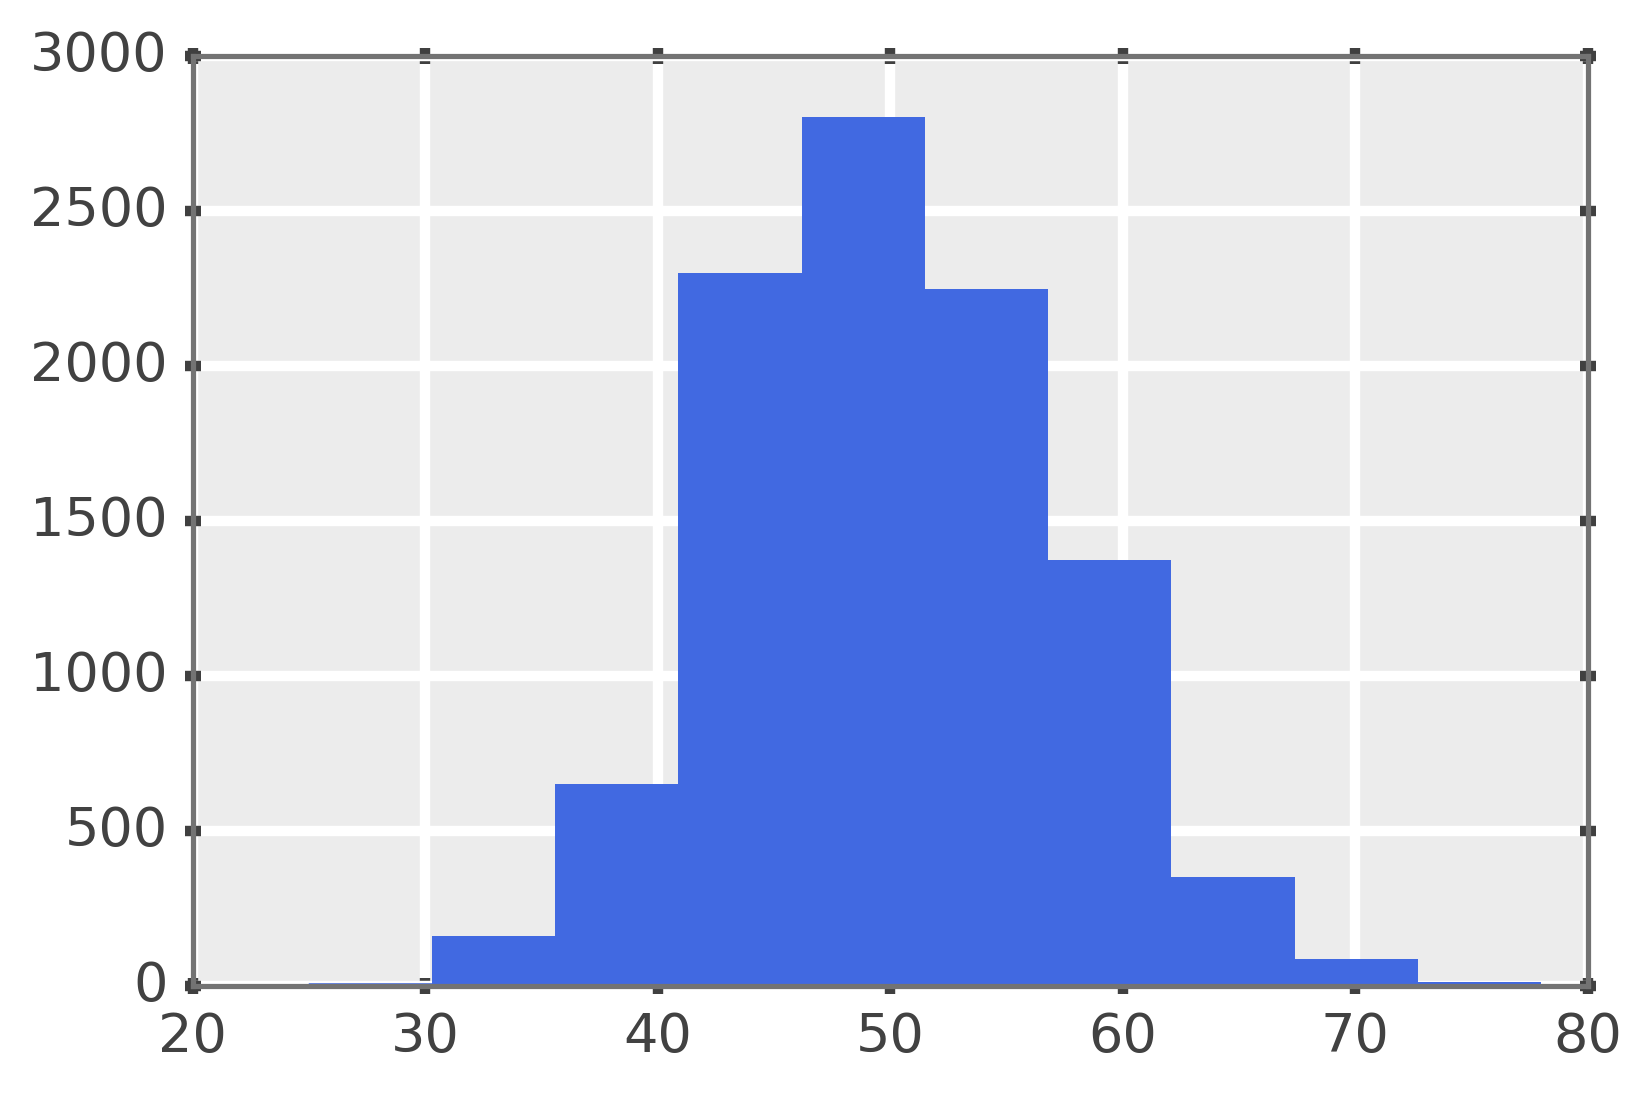

In [9]:
np.random.seed(8675309)
test_data_dist = pymc.Poisson('Test_Data', mu=50)

test_data = [test_data_dist.random() for v in range(10000)]
# print(d_tmp)
plt.hist(test_data, 10)


In [10]:
rate = pymc.Uniform('mean', lower=0, upper=1000)
data = pymc.Poisson('Data', mu=rate, observed=True, value=test_data[::100])

model = pymc.MCMC((rate, data))


In [11]:
model.sample(iter=10000, burn=1000, verbose=0, progress_bar=1, burn_till_tuned=True, thin=10)




 [------------------------------------201%------------------------------------] 28143 of 14000 complete in 1.0 sec

{'mean': {'95% HPD interval': array([ 48.99394806,  51.62555978]),
          'mc error': 0.021721506216243316,
          'mean': 50.407994540338031,
          'n': 900,
          'quantiles': {2.5: 49.094770605574844,
                        25: 49.932985495720011,
                        50: 50.402570205060314,
                        75: 50.904732180966597,
                        97.5: 51.771866267555204},
          'standard deviation': 0.67507229773265665}}
Plotting mean


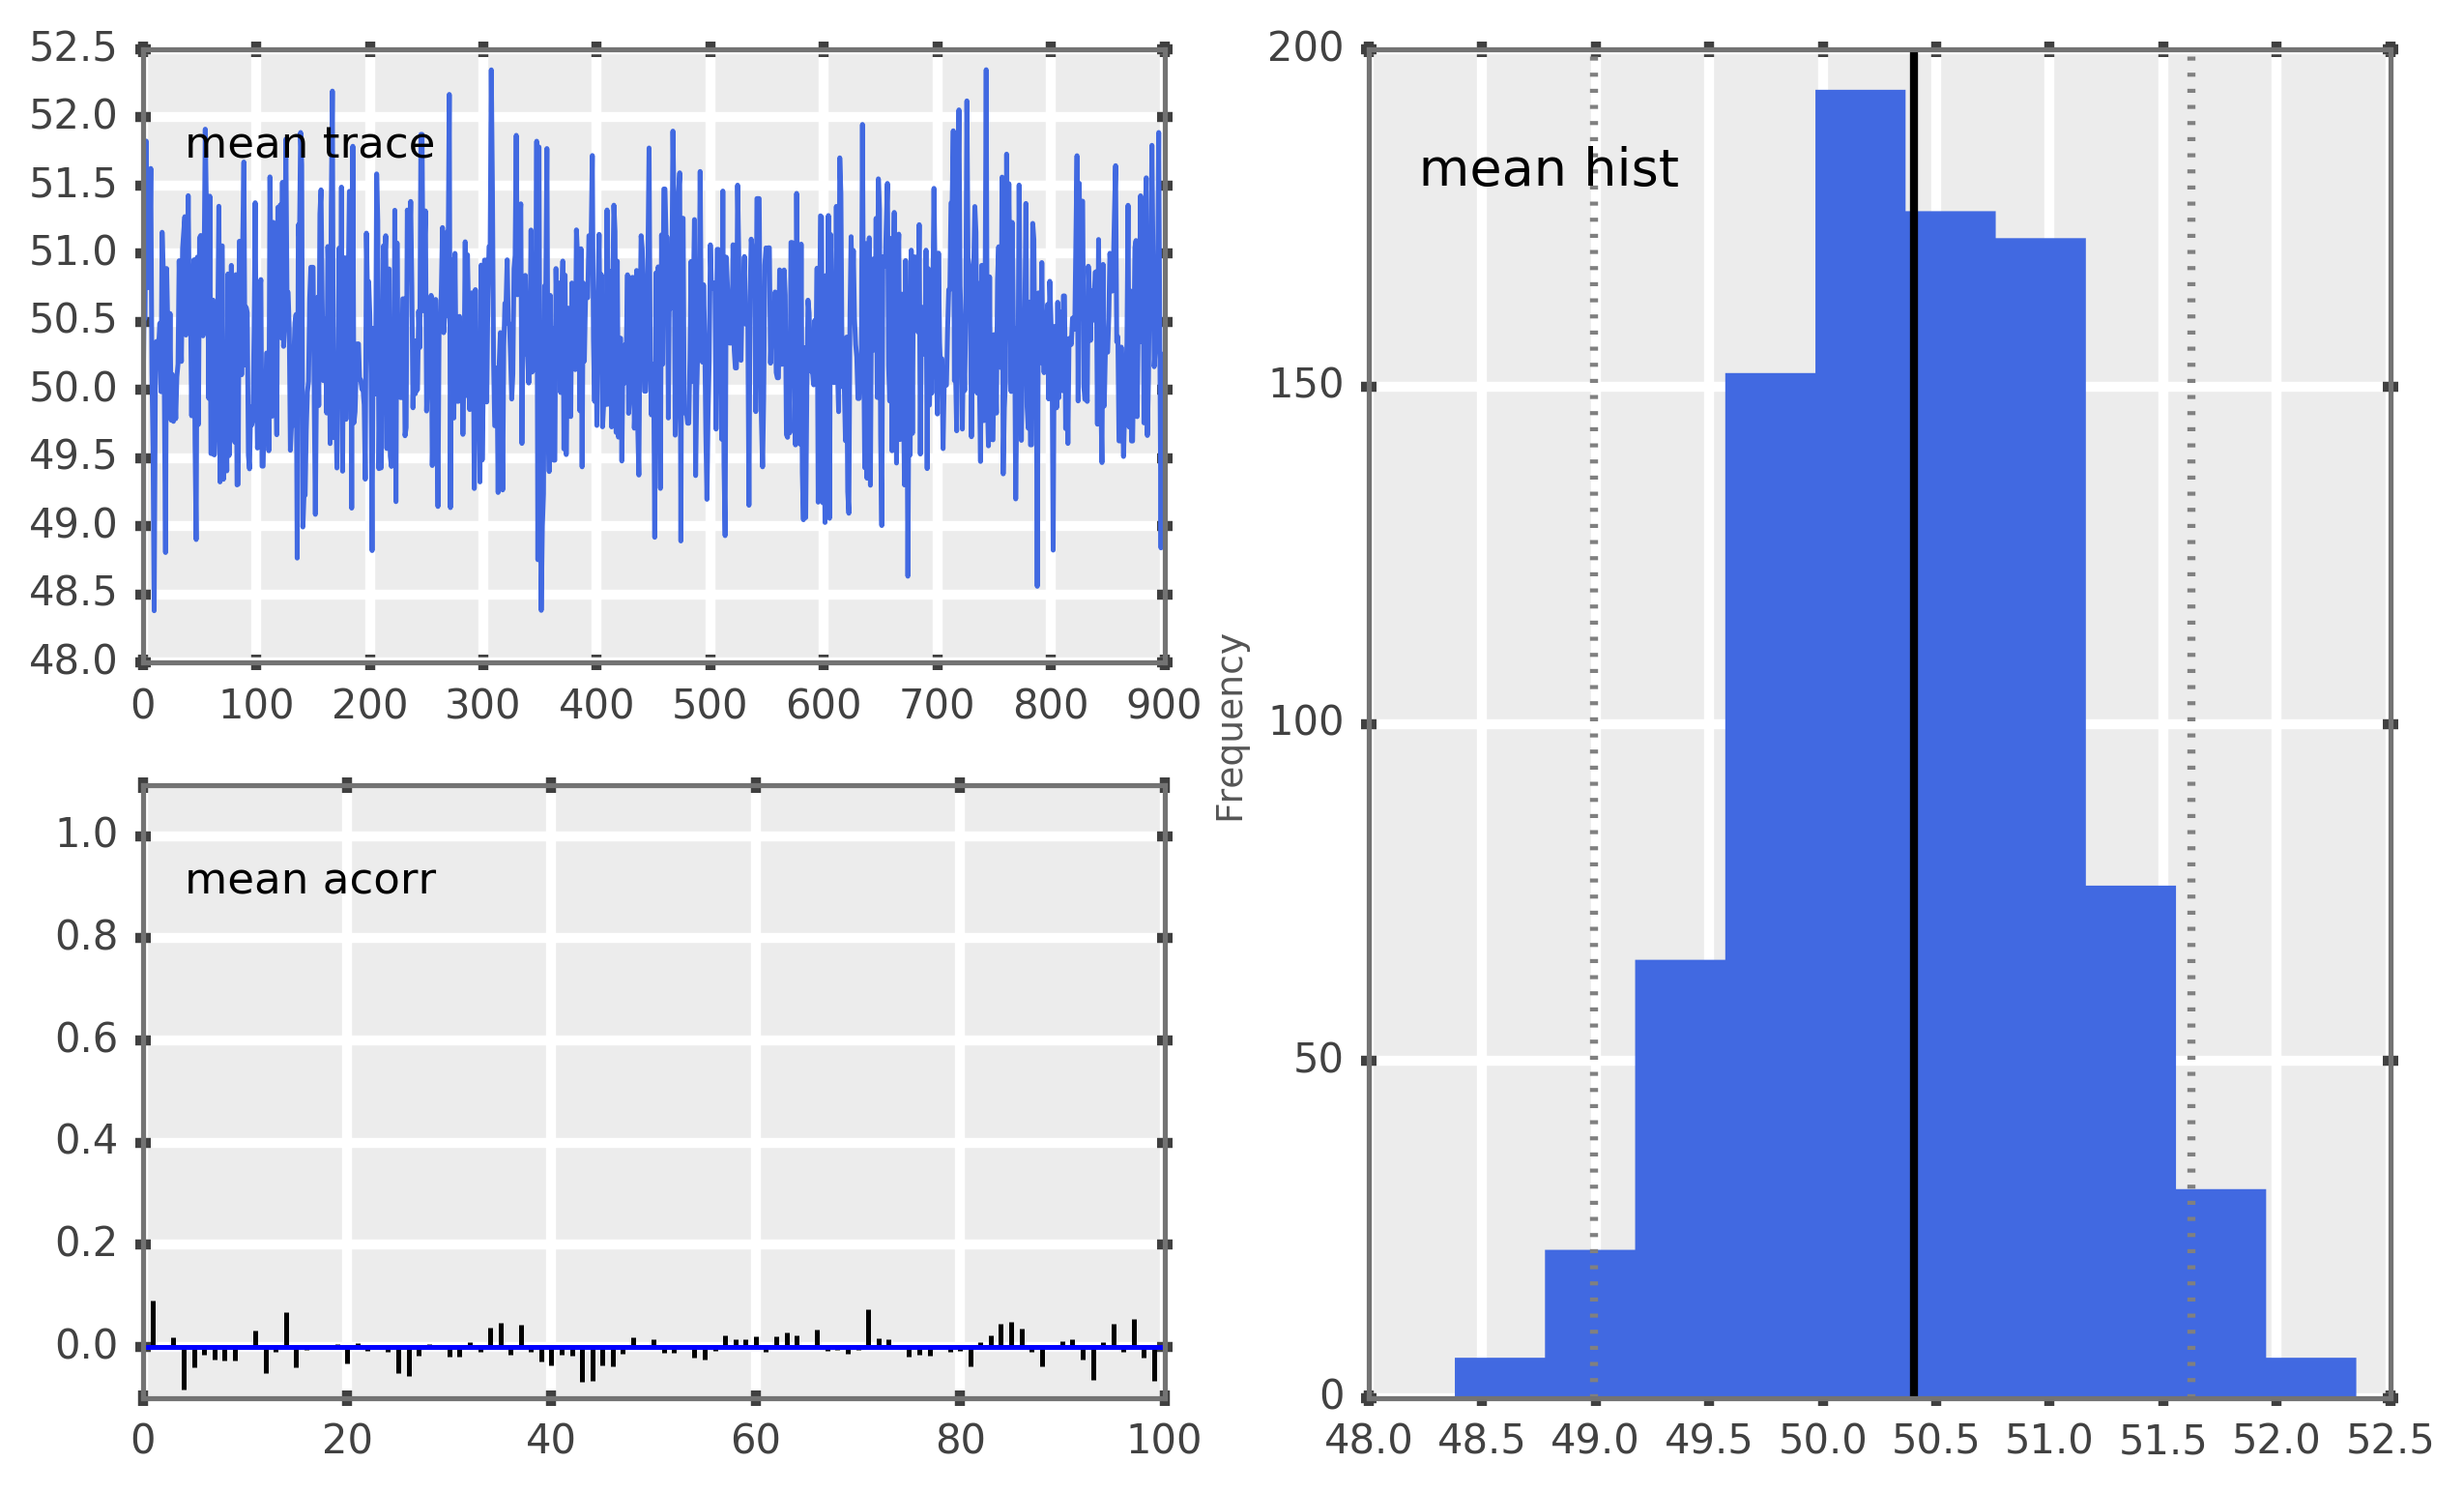

In [12]:
pprint(model.stats())
pymc.Matplot.plot(model)


In [13]:
ans = []

for n_iter in tb.logspace(1e1, 1e6, 10):
    print('%%%%%%%', n_iter)
    del model
    model = pymc.MCMC((rate, data))
    model.sample(iter=10000, burn=1000, verbose=0, thin=10, progress_bar=1, burn_till_tuned=True)
    ans.append((n_iter, model.stats()))
    

%%%%%%% 10.0
 [-----------------100%-----------------] 14000 of 14000 complete in 0.5 sec%%%%%%% 35.938136638
 [-----------------100%-----------------] 14096 of 14000 complete in 0.5 sec%%%%%%% 129.154966501
 [-----------------------------------198%------------------------------------] 27829 of 14000 complete in 1.0 sec%%%%%%% 464.158883361
 [-----------------------------------199%------------------------------------] 27993 of 14000 complete in 1.0 sec%%%%%%% 1668.1005372
 [-----------------101%-----------------] 14202 of 14000 complete in 0.5 sec%%%%%%% 5994.84250319
 [------------------------------------200%------------------------------------] 28104 of 14000 complete in 1.0 sec%%%%%%% 21544.3469003
 [-----------------------------------199%------------------------------------] 27952 of 14000 complete in 1.0 sec%%%%%%% 77426.3682681
 [-----------------101%-----------------] 14183 of 14000 complete in 0.5 sec%%%%%%% 278255.940221
 [-----------------------------------196%---------------

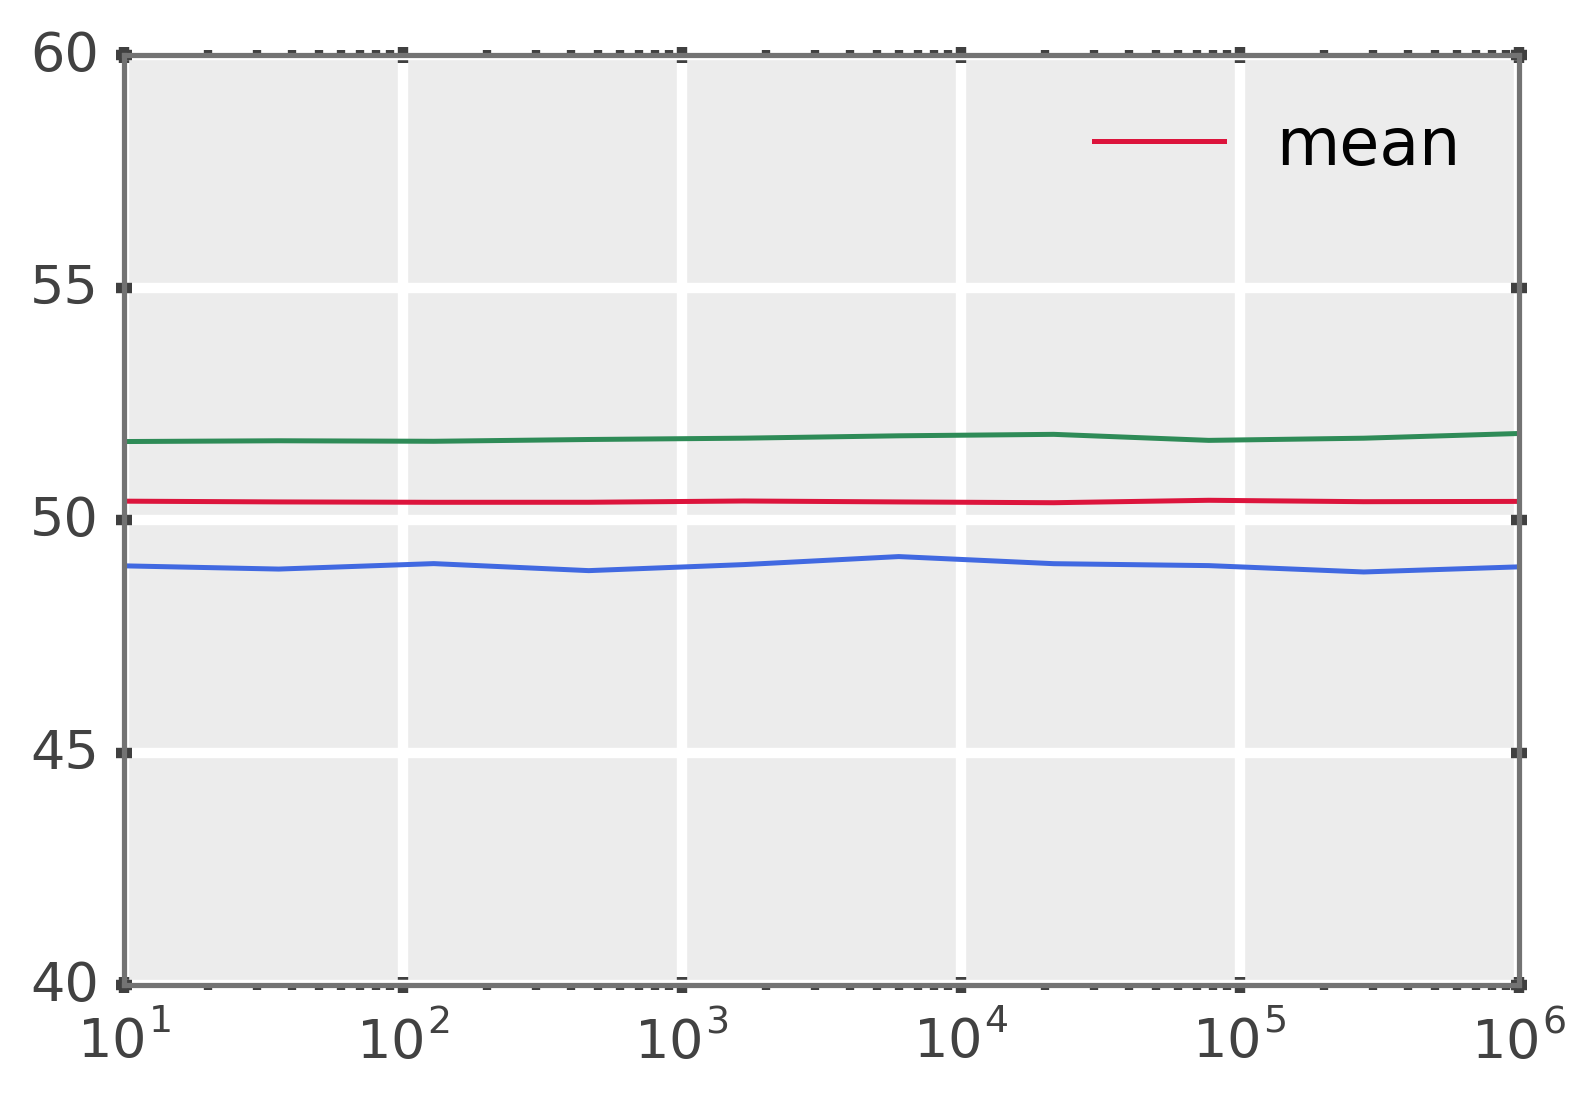

In [19]:
n_iter = [v[0] for v in ans]
plt_range = [v[1]['mean']['95% HPD interval'] for v in ans]
plt.figure()
plt.loglog(n_iter, plt_range)
plt.ylim((4e1, 6e1))
plt.loglog(n_iter, [v[1]['mean']['mean'] for v in ans], label='mean')
plt.legend()
# plt.gca().locator_params(axis='y',nbins=10)
plt.yscale('linear')

# now what does a coincidence do?